# Riot Base Model

Our base equation will be modeled after the SIR Model

x(t) = number of potential rioters at time t  
y(t) = number of active rioters at time t  
z(t) = cumulative number of removals at time t  
v(t) = cumulative number of events at time t  

Condition: x + y + z = 1

$\beta$: contagion coefficient  
$\gamma$: removal coefficient  
$\alpha$: events per rioter  

$$
\frac{dx}{dt} = -\beta x y
$$
$$
\frac{dy}{dt} = \beta x y - \gamma y
$$
$$
\frac{dz}{dt} = \gamma y
$$
$$
\frac{dv}{dt} = \alpha y 
$$

In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# define our coefficients
# if beta and gamma are distributions, I'm assuming they are in respect to time
beta = lambda t: 1
gamma = lambda t: 1
alpha = 1

# define our initial parameters
city_pop = 3e5
init_rioters = 5
init_removals = 0
init_events = 0

# define our riot ode system as specified above
def ode(t, x):
    return np.array([-beta(t)*x[0]*x[1], beta(t)*x[0]*x[1] - gamma(t)*x[1], gamma(t)*x[1], alpha*x[0]])

# define the time parameters (hours)
t0 = 0
tf = 1

# define the initial condition
y0 = np.array([(city_pop - init_rioters)/city_pop, init_rioters/city_pop, init_removals/city_pop, init_events/city_pop])

#solve the system
sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 150))

In [3]:
#potential next step: we could look at fitting models with SciPy's optimize.minimize (we did this in the SIR model)

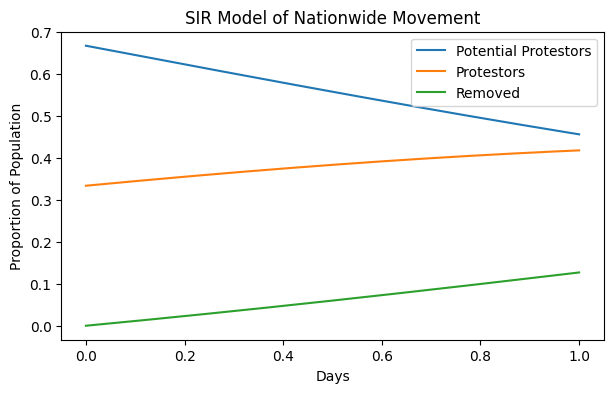

In [ ]:
# doing a grid search approach


# define our coefficients
# if beta and gamma are distributions, I'm assuming they are in respect to time
beta_lst = np.linspace(0, 1, 5)
beta_lst = [1]
gamma_lst = np.linspace(0, 1, 5)
gamma_lst = [1/3]
alpha = 1

# define our initial parameters
city_pop = 3e5
init_rioters = 1e5
init_removals = 0
init_events = 0

for beta in beta_lst:
    for gamma in gamma_lst:
        # define our riot ode system as specified above
        def ode(t, x):
            return np.array([-beta * x[0] * x[1], 
                             beta * x[0] * x[1] - gamma * x[1], 
                             gamma * x[1]]) 
                             # alpha*x[0]]

        # define the time parameters (hours)
        t0 = 0
        tf = 1
        t = np.linspace(t0, tf, 150)

        # define the initial condition
        y0 = np.array([(city_pop - init_rioters)/city_pop, init_rioters/city_pop, init_removals/city_pop])

        #solve the system
        sol = solve_ivp(ode, (t0, tf), y0, t_eval=t)
        # plot SIR model
        plt.figure(figsize=(7, 4))
        plt.plot(t, sol.y[0], label='Potential Protestors')
        plt.plot(t, sol.y[1], label='Protestors')
        plt.plot(t, sol.y[2], label='Removed')
        plt.xlabel("Days")
        plt.ylabel("Proportion of Population")
        plt.title("SIR Model of Nationwide Movement")
        plt.legend()
        plt.show()